# Receptive Field:

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt


def gradient_input(model, inp, output_index = 0):
  inp_tensor = tf.convert_to_tensor(inp, dtype=tf.float32)
  with tf.GradientTape() as t:
    t.watch(inp_tensor)
    output = tf.squeeze(model(inp_tensor))
    if output.ndim >0: my_output = output[output_index]
    else: my_output = output
    gradient = t.gradient(my_output, inp_tensor)
    gradient = np.squeeze(np.array(gradient))
    return gradient

# Build a simple CNN with strided convolution layers 
def define_model():
    inputs = tf.keras.Input(shape=(128,128,1),name='Inputs')
    x = layers.Conv2D(16,kernel_size=(5,5),activation='tanh',strides=1,name='L1')(inputs)
    x = layers.Conv2D(16,kernel_size=(5,5),activation='tanh',strides=2,name='L2')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='tanh',strides=1,name='L3')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='tanh',strides=2,name='L4')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='tanh',strides=1,name='L5')(x)
    x = layers.Conv2D(16,kernel_size=(3,3),activation='tanh',strides=2,name='L6')(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(10,activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


def output_intermediate_layer(model, layername,x,y,channel):
  output = model.get_layer(layername).output[0,x,y,channel]
  return keras.Model(inputs=model.input, outputs = output)

def get_gradient(model,layer_name,x,y,c,inp):
    intermediate = output_intermediate_layer(model, layer_name, x, y, c)
    gradient = gradient_input(intermediate, inp, 0)
    return gradient


model = define_model()

# generate random input
inp = np.random.uniform(0,1,size=(1,128,128,1))

gradient = get_gradient(model,'L6',0,0,0,inp)

Layer L1


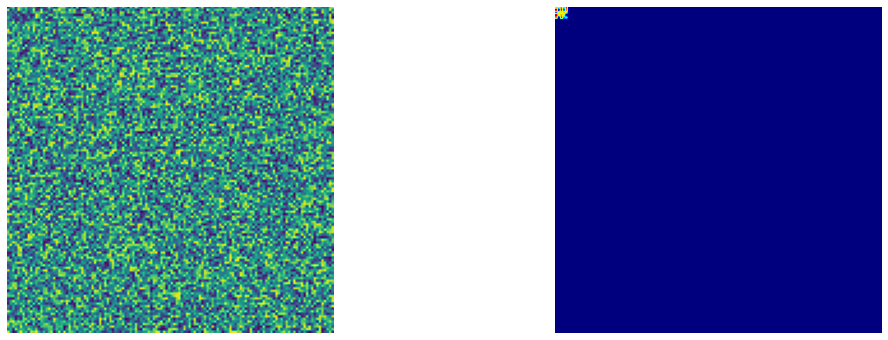

Layer L2


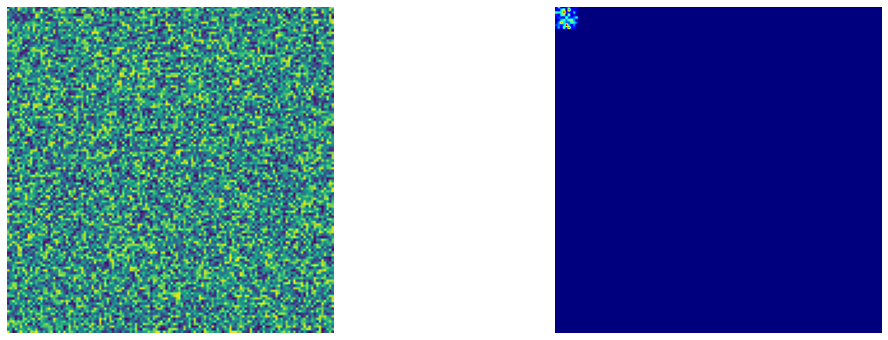

Layer L3


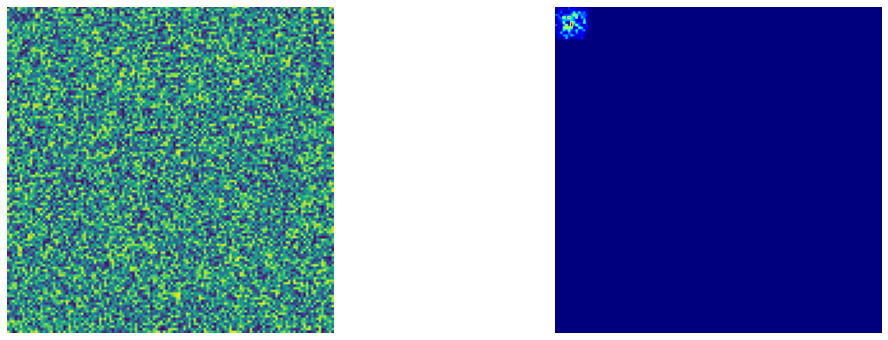

Layer L4


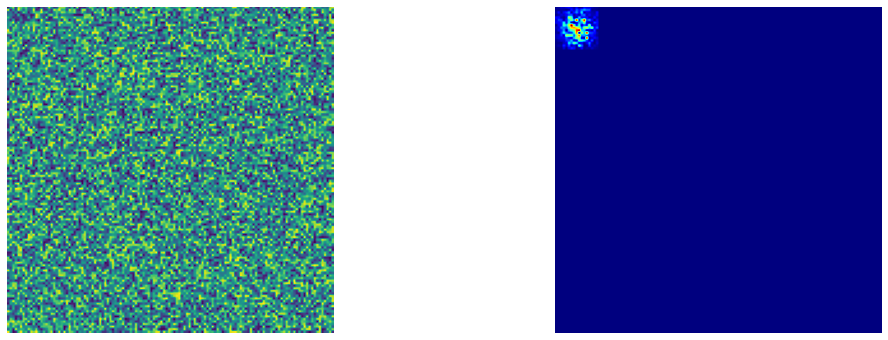

Layer L5


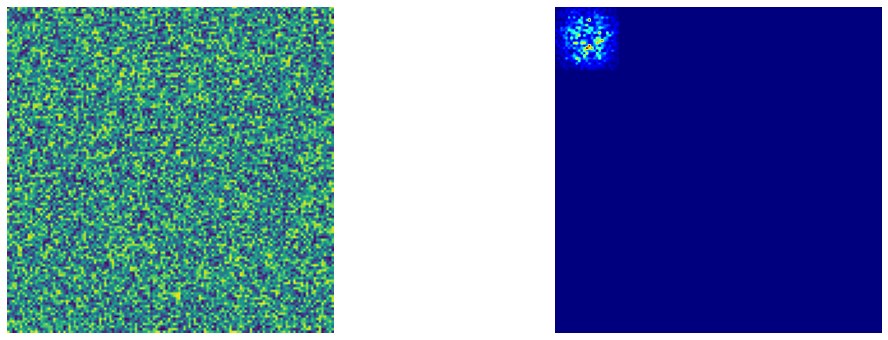

Layer L6


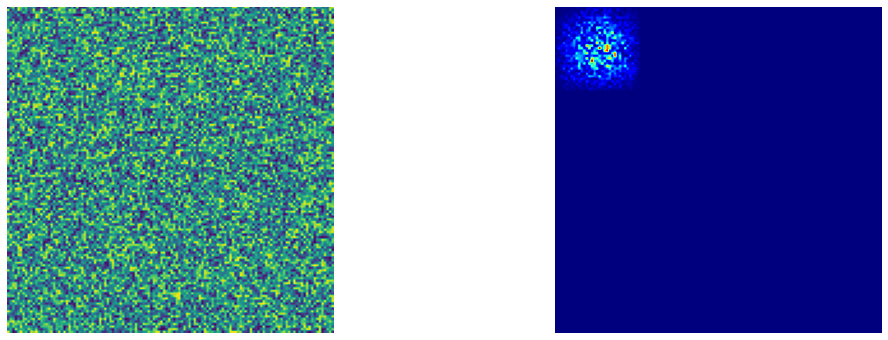

In [6]:
for L in ['L1', 'L2', 'L3', 'L4', 'L5', 'L6']:
 gradient = get_gradient(model,L,0,0,0,inp)
 gradient_abs = tf.math.abs(gradient)
 print(f'Layer {L}')
 plt.rcParams['figure.figsize'] = (18, 6)
 fig, ax = plt.subplots(1, 2)
 ax[0].imshow(inp.reshape(128,128))
 ax[0].axis('off')
 ax[1].imshow(gradient_abs, cmap = 'jet')
 ax[1].axis('off')
 plt.show()